# Example of interactive Camera Calibration and optimization of parameters

In [1]:
import numpy as np
import os, glob, datetime, tqdm, argparse
import cv2
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.path import Path

import openCV_CC

In [2]:
#1. Load existing Camera Calibration (calibrate camera and stereo rig separately)
# #landscape
# H=6000
# W=4000

#portrait
W=6000
H=4000

imsize = np.array([H, W]) 
H0 = H
W0 = W
H1 = H
W1 = W

cameraMatrixInit = np.array([[ 9000.,    0., imsize[0]/2.],
                             [    0., 9000., imsize[1]/2.],
                             [    0.,    0.,           1.]])
D=np.zeros((5,1))

K0 = cameraMatrixInit
D0 = D

K1 = cameraMatrixInit
D1 = D

fname='/home/bodo/ownCloud/calibration_sessions/20220323/images/sony_a_b_c_d_stereo/sony_a/charuco/DSC00003.JPG'
img = cv2.imread(fname, flags=cv2.IMREAD_COLOR)
plt.imshow(img)
print(img.shape)

In [3]:
#2a. Find charuco markers and image coordinates using existing CC
# image_files0="/home/bodo/Dropbox/rig-2022-02-08-ar/Calib-10Feb_2022/camera_black_a/*.JPG"
# image_files0='/home/bodo/Dropbox/sony_stereo_f13_iso1600/charuco/black_a_stereo/*.JPG'
# charuco_files_camA='/home/bodo/ownCloud/calibration_sessions/20220323/images/sony_a_b_c_d_stereo/sony_a/charuco/*.JPG'
charuco_files_camA='/home/bodo/Dropbox/sony_stereo_f13_iso1600/charuco/black_a_stereo/*.JPG'

(camA_corners_charuco, camA_ids_charuco, camA_imsize_charuco, camA_CC_rms_charuco, camA_camera_matrix_charuco, camA_distortion_coefficients_charuco,
 camA_rotation_vectors_charuco, camA_translation_vectors_charuco, camA_CHARUCO_BOARD) = openCV_CC.CC_charucoboard(charuco_files_camA, K0, D0, W0, H0,
 savepng_output=True, savepng_corners_output_file='camA_charuco_', savepng_path='./', CHARUCOBOARD_ROWCOUNT = 18, CHARUCOBOARD_COLCOUNT = 25,
 square_size_m = 0.015, marker_length_m=0.012, CHARUCO_DICT = cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_1000) )

# camA_savexml_file = '/home/bodo/Dropbox/sony_stereo_f13_iso1600/charuco/cam_A_black_calib_9parameters_fine_charuco_25Mar2022.xml'
# allCorners_sum = sum( [ len(listElem) for listElem in camA_corners_charuco])
# plot_img_corners(camA_corners_charuco, png_fname=os.path.join(dirname, 'camA_charuco_%03dcorners.png'%allCorners_sum),
#     title='CamA Charuco corners (%d) from %02d images'%(allCorners_sum, len(camA_corners_charuco)), w=6000, h=4000, fontsize=10)


Loading images from directory /home/bodo/Dropbox/sony_stereo_f13_iso1600/charuco/black_a_stereo...
reading DSC00053.JPG, found 91 corners, sub-pixel detection and storing to array.
reading DSC00054.JPG, found 168 corners, sub-pixel detection and storing to array.
reading DSC00055.JPG, found 206 corners, sub-pixel detection and storing to array.
reading DSC00056.JPG, found 192 corners, sub-pixel detection and storing to array.
reading DSC00057.JPG, found 201 corners, sub-pixel detection and storing to array.
reading DSC00058.JPG, found 201 corners, sub-pixel detection and storing to array.
reading DSC00059.JPG, found 179 corners, sub-pixel detection and storing to array.
reading DSC00060.JPG, found 168 corners, sub-pixel detection and storing to array.
reading DSC00061.JPG, found 75 corners, sub-pixel detection and storing to array.
reading DSC00062.JPG, found 44 corners, sub-pixel detection and storing to array.
reading DSC00063.JPG, found 179 corners, sub-pixel detection and storing t

In [5]:
!ls -larth *.png

-rw-rw-r-- 1 bodo bodo 204K Mär 27 16:43 camA_chess_3808corners.png
-rw-rw-r-- 1 bodo bodo 5,9M Mär 27 17:47 camA_charuco_27images.png
-rw-rw-r-- 1 bodo bodo 7,4M Mär 27 17:48 camB_chessboard_08images.png
-rw-rw-r-- 1 bodo bodo 201K Mär 27 17:49 camB_chess_3808corners.png
-rw-rw-r-- 1 bodo bodo 7,7M Mär 27 17:49 camA_chessboard_08images.png
-rw-rw-r-- 1 bodo bodo 8,6M Mär 27 18:07 camA_chessboard_20images.png
-rw-rw-r-- 1 bodo bodo 394K Mär 27 18:08 camA_chess_9520corners.png
-rw-rw-r-- 1 bodo bodo 8,2M Mär 27 18:09 camB_chessboard_20images.png
-rw-rw-r-- 1 bodo bodo 396K Mär 27 18:11 camB_chess_9520corners.png
-rw-rw-r-- 1 bodo bodo 147K Mär 27 18:16 2panel.png
-rw-rw-r-- 1 bodo bodo 5,0M Mär 27 21:05 6panel.png
-rw-rw-r-- 1 bodo bodo 5,0M Mär 27 21:13 camA_charuco_18images.png


In [98]:
!eog camA_charuco_27images.png

In [6]:
!eog camA_charuco_18images.png

In [7]:
# charuco_files_camB='/home/bodo/ownCloud/calibration_sessions/20220323/images/sony_a_b_c_d_stereo/sony_b/charuco/*.JPG'
charuco_files_camB='/home/bodo/Dropbox/sony_stereo_f13_iso1600/charuco/silver_b_stereo/*.JPG'

(camB_corners_charuco, camB_ids_charuco, camB_imsize_charuco, camB_CC_rms_charuco, camB_camera_matrix_charuco, camB_distortion_coefficients_charuco,
 camB_rotation_vectors_charuco, camB_translation_vectors_charuco, camB_CHARUCO_BOARD) = openCV_CC.CC_charucoboard(charuco_files_camB, K1, D1, W1, H1,
 savepng_output=True, savepng_corners_output_file='camA_charuco_', savepng_path='./', CHARUCOBOARD_ROWCOUNT = 18, CHARUCOBOARD_COLCOUNT = 25,
 square_size_m = 0.015, marker_length_m=0.012, CHARUCO_DICT = cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_1000) )

Loading images from directory /home/bodo/Dropbox/sony_stereo_f13_iso1600/charuco/silver_b_stereo...
reading DSC00053.JPG, found 165 corners, sub-pixel detection and storing to array.
reading DSC00054.JPG, found 118 corners, sub-pixel detection and storing to array.
reading DSC00055.JPG, found 161 corners, sub-pixel detection and storing to array.
reading DSC00056.JPG, found 177 corners, sub-pixel detection and storing to array.
reading DSC00057.JPG, found 96 corners, sub-pixel detection and storing to array.
reading DSC00058.JPG, found 66 corners, sub-pixel detection and storing to array.
reading DSC00059.JPG, found 194 corners, sub-pixel detection and storing to array.
reading DSC00060.JPG, found 158 corners, sub-pixel detection and storing to array.
reading DSC00061.JPG, found 86 corners, sub-pixel detection and storing to array.
reading DSC00062.JPG, found 120 corners, sub-pixel detection and storing to array.
reading DSC00063.JPG, found 90 corners, sub-pixel detection and storing t

In [9]:
chess_files_camA='/home/bodo/ownCloud/calibration_sessions/20220323/images/sony_a_b_c_d_stereo/sony_a/chess/*.JPG'
chess_files_camA='/home/bodo/Dropbox/sony_stereo_f13_iso1600/chess/black_a_stereo/*.JPG'

chessboard_width=29-1
chessboard_height=18-1
K0 = camA_camera_matrix_charuco
D0 = camA_distortion_coefficients_charuco

dirname='./'
(camA_objpoints_chess, camA_imgpoints_chess, camA_image_true_fn_chess, camA_image_size_chess, camA_rmsRO_chess, camA_camera_matrix_chess,
 camA_distortion_coefficients_chess, camA_rvecs_chess, camA_tvecs_chess) = openCV_CC.CC_chessboard(chess_files_camA, K0.copy(), D0.copy(),
                                                                       chessboard_width=chessboard_width,
                                                                       chessboard_height=chessboard_height,
                                                                       savepng_output=True,
                                                                       savepng_corners_output_file='camA_chessboard_',
                                                                       savepng_path=dirname,
                                                                       savexml_file='camA_chess.xml',
                                                                       savexml_file_lowest75p='camA_75plowest_chess.xml')
allCorners_sum = sum( [ len(listElem) for listElem in camA_imgpoints_chess])

reading DSC00017.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00018.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00019.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00020.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00021.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00022.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00023.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00024.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00025.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00026.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00027.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00028.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00029.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00030.JPG, found Chessboard Corners, found SubPixel corner.
readin

In [10]:
openCV_CC.plot_img_corners(camA_imgpoints_chess, png_fname=os.path.join(dirname, 'camA_chess_%03dcorners.png'%allCorners_sum),
    title='CamA Chess corners (%d) from %02d images'%(allCorners_sum, len(camA_imgpoints_chess)), w=4000, h=6000, fontsize=10)


In [32]:
!eog camA_chess_3808corners.png

In [36]:
chess_files_camB='/home/bodo/ownCloud/calibration_sessions/20220323/images/sony_a_b_c_d_stereo/sony_b/chess/*.JPG'
chess_files_camB='/home/bodo/Dropbox/sony_stereo_f13_iso1600/chess/silver_b_stereo/*.JPG'

chessboard_width=29-1
chessboard_height=18-1
K1 = camB_camera_matrix_charuco
D1 = camB_distortion_coefficients_charuco

dirname='./'
(camB_objpoints_chess, camB_imgpoints_chess, camB_image_true_fn_chess, camB_image_size_chess, camB_rmsRO_chess, camB_camera_matrix_chess,
 camB_distortion_coefficients_chess, camB_rvecs_chess, camB_tvecs_chess) = openCV_CC.CC_chessboard(chess_files_camB, K1.copy(), D1.copy(),
                                                                       chessboard_width=chessboard_width,
                                                                       chessboard_height=chessboard_height,
                                                                       savepng_output=True,
                                                                       savepng_corners_output_file='camB_chessboard_',
                                                                       savepng_path=dirname,
                                                                       savexml_file='camB_chess.xml',
                                                                       savexml_file_lowest75p='camB_75plowest_chess.xml')
allCorners_sum = sum( [ len(listElem) for listElem in camB_imgpoints_chess])
openCV_CC.plot_img_corners(camB_imgpoints_chess, png_fname=os.path.join(dirname, 'camB_chess_%03dcorners.png'%allCorners_sum),
    title='camB Chess corners (%d) from %02d images'%(allCorners_sum, len(camB_imgpoints_chess)), w=6000, h=4000, fontsize=10)


reading DSC00017.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00018.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00019.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00020.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00021.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00022.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00023.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00024.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00025.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00026.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00027.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00028.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00029.JPG, found Chessboard Corners, found SubPixel corner.
reading DSC00030.JPG, found Chessboard Corners, found SubPixel corner.
readin

In [34]:
!eog camB_chess_3808corners.png

In [37]:
camA_fn_basename_true=[]
for fn in camA_image_true_fn_chess:
    camA_fn_basename_true.append(os.path.basename(fn))

camB_fn_basename_true=[]
for fn in camB_image_true_fn_chess:
    camB_fn_basename_true.append(os.path.basename(fn))

camAB_fn=[]
camA_fn_idx=[]
camB_fn_idx=[]
for camA_i in range(len(camA_fn_basename_true)):
    camA_i_fn = camA_fn_basename_true[camA_i]
    if camA_i_fn in camB_fn_basename_true:
        camAB_fn.append(camA_i_fn)
        camA_fn_idx.append(camA_i)
        camB_fn_idx.append(camB_fn_basename_true.index(camA_i_fn))

camA_objpoints2 = [camA_objpoints_chess[i] for i in camA_fn_idx]
camB_objpoints2 = [camB_objpoints_chess[i] for i in camB_fn_idx]
camA_imgpoints2 = [camA_imgpoints_chess[i] for i in camA_fn_idx]
camB_imgpoints2 = [camB_imgpoints_chess[i] for i in camB_fn_idx]
camA_image_true_fn2 = [camA_image_true_fn_chess[i] for i in camA_fn_idx]
camB_image_true_fn2 = [camB_image_true_fn_chess[i] for i in camB_fn_idx]
camA_rvecs2 = [camA_rvecs_chess[i] for i in camA_fn_idx]
camB_rvecs2 = [camB_rvecs_chess[i] for i in camB_fn_idx]
camA_tvecs2 = [camA_tvecs_chess[i] for i in camA_fn_idx]
camB_tvecs2 = [camB_tvecs_chess[i] for i in camB_fn_idx]

In [38]:
#3b. Stereo Camera Calibration using openCV optimized parameters - charuco board
(K0_opencv_new, D0_opencv_new, K1_opencv_new, D1_opencv_new, R_opencv_all_chess, T_opencv_all_chess,
 E_opencv_all_chess, F_opencv_all_chess,
 R0_opencv_all_chess, R1_opencv_all_chess, P0_opencv_all_chess, P1_opencv_all_chess,
 Q_opencv_all_chess, camA_roi_left, camB_roi_right) = openCV_CC.stereo_CC_chessboard(
    'stereo_CC.xml', camA_image_size_chess,
    camA_objpoints2, camA_imgpoints2, camB_imgpoints2,
    camA_camera_matrix_charuco, camA_distortion_coefficients_charuco, camB_camera_matrix_charuco, camB_distortion_coefficients_charuco)


Calibrating Stereo Camera and saving to XML. Using fixed intrinsic CC ... 

1. Stereo calibration (stereoCalibrate): 
Stereo calibration rms:  0.9932684558906607
Stereo calibration T:  [[0.23202386]
 [0.00260441]
 [0.01203689]]
Stereo calibration R:  [[ 0.99491961 -0.00688254 -0.10043708]
 [ 0.00958863  0.99960321  0.02648533]
 [ 0.10021494 -0.02731383  0.99459083]]
Stereo calibration F:  [[ 3.65355088e-10 -3.03741695e-08  1.10889447e-04]
 [-2.82993918e-08  1.56965019e-08 -5.26033754e-03]
 [ 4.66824167e-05  5.36398809e-03  1.00000000e+00]]
Distance between cameras:  0.23235047524820054

2. Stereo calibration using R_initial and T_initial from first run (stereoCalibrateExtended):
Stereo calibration rms:  0.9932684558906607
Stereo calibration T:  [[0.23202386]
 [0.00260441]
 [0.01203689]]
Stereo calibration R:  [[ 0.99491961 -0.00688254 -0.10043708]
 [ 0.00958863  0.99960321  0.02648533]
 [ 0.10021494 -0.02731383  0.99459083]]
Stereo calibration F:  [[ 3.65355088e-10 -3.03741695e-08  1.1

In [39]:
#4b. Calculation of fundamental Matrix from OpenCV Data
(F_RANSAC_opencv_all_chessboard, F_RANSAC_opencv_all_chessboard_mask,
 E_RANSAC_opencv_all_chessboard, E_RANSAC_opencv_all_chessboard_mask, opencv_K0_optimal, openCV_K1_optimal) = openCV_CC.calc_Fundamental_matrix(
     camA_image_size_chess, np.squeeze(np.array(camA_imgpoints_chess)).reshape(np.squeeze(np.array(camA_imgpoints_chess)).shape[0]*np.squeeze(np.array(camA_imgpoints_chess)).shape[1],2),
     camA_camera_matrix_charuco, camA_distortion_coefficients_charuco,
     np.squeeze(np.array(camA_imgpoints_chess)).reshape(np.squeeze(np.array(camA_imgpoints_chess)).shape[0]*np.squeeze(np.array(camA_imgpoints_chess)).shape[1],2),
     camB_camera_matrix_charuco, camB_distortion_coefficients_charuco, R_opencv_all_chess, T_opencv_all_chess)
print('Fundamental matrix with openCV chessboard:')
print(F_RANSAC_opencv_all_chessboard)


Fundamental matrix with openCV chessboard:
[[ 5.84030040e-08 -1.05950425e-06 -1.63461910e-03]
 [ 1.03847349e-06  1.08461103e-08 -1.92286629e-03]
 [ 1.56228138e-03  2.71977721e-03  1.00000000e+00]]


In [40]:
camA_files = chess_files_camA
camB_files = chess_files_camB

camA_fn = glob.glob(camA_files)
camA_fn.sort()
if len(camA_fn) == 0:
    print('no image files found in %s'%camA_fn)

camB_fn = glob.glob(camB_files)
camB_fn.sort()
if len(camB_fn) == 0:
    print('no image files found in %s'%camB_fn)

if not os.path.exists('rectified'):
    os.mkdir('rectified')
if not os.path.exists('depthmaps'):
    os.mkdir('depthmaps')


In [44]:
print('loading file i of %02d: '%len(camA_fn))
for ifile in range(len(camA_fn)):


['/home/bodo/ownCloud/calibration_sessions/20220323/images/sony_a_b_c_d_stereo/sony_a/chess/DSC00031.JPG',
 '/home/bodo/ownCloud/calibration_sessions/20220323/images/sony_a_b_c_d_stereo/sony_a/chess/DSC00032.JPG',
 '/home/bodo/ownCloud/calibration_sessions/20220323/images/sony_a_b_c_d_stereo/sony_a/chess/DSC00033.JPG',
 '/home/bodo/ownCloud/calibration_sessions/20220323/images/sony_a_b_c_d_stereo/sony_a/chess/DSC00034.JPG',
 '/home/bodo/ownCloud/calibration_sessions/20220323/images/sony_a_b_c_d_stereo/sony_a/chess/DSC00035.JPG',
 '/home/bodo/ownCloud/calibration_sessions/20220323/images/sony_a_b_c_d_stereo/sony_a/chess/DSC00036.JPG',
 '/home/bodo/ownCloud/calibration_sessions/20220323/images/sony_a_b_c_d_stereo/sony_a/chess/DSC00037.JPG',
 '/home/bodo/ownCloud/calibration_sessions/20220323/images/sony_a_b_c_d_stereo/sony_a/chess/DSC00038.JPG']

In [103]:
ifile=2
print('%02d, '%ifile, end='', flush=True)
camA_frame = cv2.imread(camA_fn[ifile], flags=cv2.IMREAD_IGNORE_ORIENTATION | cv2.IMREAD_COLOR)
camA_frame_gray = cv2.cvtColor(camA_frame, cv2.COLOR_BGR2GRAY)

camB_frame = cv2.imread(camB_fn[ifile], flags=cv2.IMREAD_IGNORE_ORIENTATION | cv2.IMREAD_COLOR)
camB_frame_gray = cv2.cvtColor(camB_frame, cv2.COLOR_BGR2GRAY)

# get points for pose estimation
camA_ifile_objpoints, camA_ifile_imgpoints, camA_image_true_fn, camA_image_size = openCV_CC.find_chessboard_markers(camA_frame_gray, chessboard_width, chessboard_height, square_size_m=0.010)
camB_ifile_objpoints, camB_ifile_imgpoints, camB_image_true_fn, camB_image_size = openCV_CC.find_chessboard_markers(camB_frame_gray, chessboard_width, chessboard_height, square_size_m=0.010)
camA_ret, camA_rvecs, camA_tvecs = cv2.solvePnP(np.squeeze(np.array(camA_ifile_objpoints)), np.squeeze(np.array(camA_ifile_imgpoints)), K0, D0)
camB_ret, camB_rvecs, camB_tvecs = cv2.solvePnP(np.squeeze(np.array(camB_ifile_objpoints)), np.squeeze(np.array(camB_ifile_imgpoints)), K1, D1)

save_stereo_file='stereo_calibration_chessboard_calib_camAB_%02d.xml'%ifile
(K0_opencv_single, D0_opencv_single, K1_opencv_single, D1_opencv_single, R_opencv_single_chess, T_opencv_single_chess,
 E_opencv_single_chess, F_opencv_single_chess,
 R0_opencv_single_chess, R1_opencv_single_chess, P0_opencv_single_chess, P1_opencv_single_chess,
 Q_opencv_single_chess, camA_opencv_single_roi_left, camB_opencv_single_roi_right) = openCV_CC.stereo_CC_chessboard(
 save_stereo_file, camA_image_size, camA_ifile_objpoints, camA_ifile_imgpoints, camB_ifile_imgpoints, camA_camera_matrix,
 camA_distortion_coefficients, camB_camera_matrix, camB_distortion_coefficients)


02, found Chessboard Corners, found SubPixel corner.
found Chessboard Corners, found SubPixel corner.
Calibrating Stereo Camera and saving to XML. Using fixed intrinsic CC ... 

1. Stereo calibration (stereoCalibrate): 
Stereo calibration rms:  0.2926086760477537
Stereo calibration T:  [[0.23249401]
 [0.00233346]
 [0.01259224]]
Stereo calibration R:  [[ 0.99487252 -0.00700343 -0.1008941 ]
 [ 0.00974942  0.99959463  0.02674929]
 [ 0.10066586 -0.0275958   0.99453751]]
Stereo calibration F:  [[ 2.78985866e-10 -3.14770147e-08  1.06343180e-04]
 [-2.70608374e-08  1.57432473e-08 -5.23013982e-03]
 [ 5.16189943e-05  5.33213646e-03  1.00000000e+00]]
Distance between cameras:  0.23284646021218394

2. Stereo calibration using R_initial and T_initial from first run (stereoCalibrateExtended):
Stereo calibration rms:  0.2926086760477537
Stereo calibration T:  [[0.23249401]
 [0.00233346]
 [0.01259224]]
Stereo calibration R:  [[ 0.99487252 -0.00700343 -0.1008941 ]
 [ 0.00974942  0.99959463  0.02674929]

In [104]:
R_opencv_all_chess-R_opencv_single_chess

array([[ 1.12085542e-04,  2.13089400e-04,  1.09668273e-03],
       [-2.69002230e-04,  9.06928675e-06, -2.43326778e-04],
       [-1.08798081e-03,  2.76645941e-04,  1.17159792e-04]])

In [105]:
T_opencv_all_chess-T_opencv_single_chess

array([[-0.00097425],
       [ 0.00024551],
       [-0.0006493 ]])

In [106]:
camA_camera_matrix-K0_opencv_single

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [107]:
camA_distortion_coefficients-D0_opencv_single

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [113]:
camB_camera_matrix = camB_camera_matrix_charuco
camB_distortion_coefficients = camB_distortion_coefficients_charuco
camA_camera_matrix = camA_camera_matrix_charuco
camA_distortion_coefficients = camA_distortion_coefficients_charuco
image_size=camA_image_size_chess
R_opencv = R_opencv_single_chess
T_opencv = T_opencv_single_chess

R0_opencv = R0_opencv_single_chess
P0_opencv = P0_opencv_single_chess
R1_opencv = R1_opencv_single_chess
P1_opencv = P1_opencv_single_chess
print(image_size)

# rectification using openCV optimized settings - using R and T from current run
K0_opencv_opt, camA_roi_opencv_opt = cv2.getOptimalNewCameraMatrix(camA_camera_matrix, camA_distortion_coefficients, image_size, alpha=0)
K1_opencv_opt, camB_roi_opencv_opt = cv2.getOptimalNewCameraMatrix(camB_camera_matrix, camB_distortion_coefficients, image_size, alpha=0)
R0_opencv_opt, R1_opencv_opt, P0_opencv_opt, P1_opencv_opt, Q_opencv_opt, roi_left_opencv_opt, roi_right_opencv_opt = cv2.stereoRectify(K0_opencv_opt, 
    camA_distortion_coefficients, K1_opencv_opt, camB_distortion_coefficients, image_size,
    R_opencv, T_opencv,
    flags=cv2.CALIB_ZERO_DISPARITY, alpha=0)
leftMapX, leftMapY = cv2.initUndistortRectifyMap(K0_opencv_opt, camA_distortion_coefficients, R0_opencv, P0_opencv,
                                                 image_size, cv2.CV_32F)
camA_rectified_opencv_opt = cv2.remap(camA_frame, leftMapX, leftMapY,  cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
camA_rectified_opencv_opt_idx0 = np.where(camA_rectified_opencv_opt[:,:,0] == 0)
rightMapX, rightMapY = cv2.initUndistortRectifyMap(K1_opencv_opt, camB_distortion_coefficients, R1_opencv, P1_opencv,
                                                   image_size, cv2.CV_32F)

camB_rectified_opencv_opt = cv2.remap(camB_frame, rightMapX, rightMapY, cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
# Convert coordinates from chessboard to undistorted coordinates (faster than running the chessboard detection on image again and avoids resampling)
#Using stereo calibration coefficients R0, P0, R1, P1
camA_imgpoints_rectified_opencv_opt = cv2.undistortPoints(np.squeeze(np.array(camA_ifile_imgpoints)),
                                                          K0_opencv_opt, camA_distortion_coefficients, None, R0_opencv, P0_opencv)
camA_imgpoints_rectified_opencv_opt = np.squeeze(camA_imgpoints_rectified_opencv_opt)
camB_imgpoints_rectified_opencv_opt = cv2.undistortPoints(np.squeeze(np.array(camB_ifile_imgpoints)),
                                                          K1_opencv_opt, camB_distortion_coefficients, None, R1_opencv, P1_opencv)
camB_imgpoints_rectified_opencv_opt = np.squeeze(camB_imgpoints_rectified_opencv_opt)


(4000, 6000)


In [114]:
matrices = {
    'true': [ [ 0.299, 0.587, 0.114, 0, 0, 0, 0, 0, 0 ], [ 0, 0, 0, 0, 0, 0, 0.299, 0.587, 0.114 ] ],
    'mono': [ [ 0.299, 0.587, 0.114, 0, 0, 0, 0, 0, 0 ], [ 0, 0, 0, 0.299, 0.587, 0.114, 0.299, 0.587, 0.114 ] ],
    'color': [ [ 1, 0, 0, 0, 0, 0, 0, 0, 0 ], [ 0, 0, 0, 0, 1, 0, 0, 0, 1 ] ],
    'halfcolor': [ [ 0.299, 0.587, 0.114, 0, 0, 0, 0, 0, 0 ], [ 0, 0, 0, 0, 1, 0, 0, 0, 1 ] ],
    'optimized': [ [ 0, 0.7, 0.3, 0, 0, 0, 0, 0, 0 ], [ 0, 0, 0, 0, 1, 0, 0, 0, 1 ] ],
}


def make_anaglyph(left, right, color):
    #Taken from https://github.com/miguelgrinberg/anaglyph.py/blob/master/anaglyph.py
    width, height = left.shape[0:2]
    leftMap = left.copy()
    rightMap = right
    m = color

    r1 = leftMap[:,:,0]
    g1 = leftMap[:,:,1]
    b1 = leftMap[:,:,2]

    r2 = rightMap[:,:,0]
    g2 = rightMap[:,:,1]
    b2 = rightMap[:,:,2]
    leftMap[:,:,0] = r1*m[0][0] + g1*m[0][1] + b1*m[0][2] + r2*m[1][0] + g2*m[1][1] + b2*m[1][2]
    leftMap[:,:,1] = r1*m[0][3] + g1*m[0][4] + b1*m[0][5] + r2*m[1][3] + g2*m[1][4] + b2*m[1][5]
    leftMap[:,:,2] = r1*m[0][6] + g1*m[0][7] + b1*m[0][8] + r2*m[1][6] + g2*m[1][7] + b2*m[1][8]
    return leftMap

def plot_camAB_6panel(ifile, image_size, camA_frame, camA_imgpoints, camB_frame, camB_imgpoints, cam_AB_anaglyph,
              camA_rectified, camA_imgpoints_rectified, camB_rectified, camB_imgpoints_rectified, png_fn):

    markersize_px = 4
    fig, ax = plt.subplots(2, 3, figsize=(12, 8), dpi=300)
    ax[0,0].imshow(camA_frame)
    ax[0,0].set_title('%02d: camA: %s'%(ifile, os.path.basename(camA_fn[ifile])), fontsize=8)
    ax[0,0].plot(np.squeeze(camA_imgpoints[0])[:,0], np.squeeze(camA_imgpoints[0])[:,1], 'rx', ms=1)
    ax[0,0].axis('tight')
    ax[0,0].axis('off')
    ax[0,0].set_aspect('equal', 'box')
    ax[0,1].imshow(camB_frame)
    ax[0,1].set_title('%02d: camB: %s'%(ifile, os.path.basename(camB_fn[ifile])), fontsize=8)
    ax[0,1].plot(np.squeeze(camB_imgpoints[0])[:,0], np.squeeze(camB_imgpoints[0])[:,1], 'rx', ms=1)
    ax[0,1].axis('tight')
    ax[0,1].axis('off')
    ax[0,1].set_aspect('equal', 'box')
    ax[0,2].imshow(cam_AB_anaglyph)
    ax[0,2].set_title('camA-B anaglyph', fontsize=8)
    ax[0,2].axis('tight')
    ax[0,2].axis('off')
    ax[0,2].set_aspect('equal', 'box')
    ax[1,0].imshow(camA_rectified)
    ax[1,0].set_title('camA rectified', fontsize=8)
    ax[1,0].plot(np.squeeze(camA_imgpoints_rectified)[:,0], np.squeeze(camA_imgpoints_rectified)[:,1], 'bx', ms=1)
    ax[1,0].hlines(1000, 0, image_size[1], linestyles='solid', colors='red', lw=1)
    ax[1,0].hlines(2000, 0, image_size[1], linestyles='solid', colors='red', lw=1)
    ax[1,0].hlines(3000, 0, image_size[1], linestyles='solid', colors='red', lw=1)
    ax[1,0].axis('tight')
    ax[1,0].axis('off')
    ax[1,0].set_aspect('equal', 'box')
    ax[1,1].imshow(camB_rectified)
    ax[1,1].plot(np.squeeze(camB_imgpoints_rectified)[:,0], np.squeeze(camB_imgpoints_rectified)[:,1], 'bx', ms=1)
    ax[1,1].hlines(1000, 0, image_size[1], linestyles='solid', colors='red', lw=1)
    ax[1,1].hlines(2000, 0, image_size[1], linestyles='solid', colors='red', lw=1)
    ax[1,1].hlines(3000, 0, image_size[1], linestyles='solid', colors='red', lw=1)
    ax[1,1].set_title('camB rectified', fontsize=8)
    ax[1,1].axis('tight')
    ax[1,1].axis('off')
    ax[1,1].set_aspect('equal', 'box')
    ax[1,2].plot(camA_imgpoints_rectified[:,1], camA_imgpoints_rectified[:,1]-camB_imgpoints_rectified[:,1], 'b+', ms=markersize_px, label='Calib.io charuco')
#         ax[1,2].plot(camA_imgpoints_rectified_calib_opt[:,1], camA_imgpoints_rectified_calib_opt[:,1]-camB_imgpoints_rectified_calib_opt[:,1], 'ro', ms=markersize_px, label='Calib.io optimized charuco')
#         ax[1,2].plot(camA_imgpoints_rectified_opencv_opt[:,1], camA_imgpoints_rectified_opencv_opt[:,1]-camB_imgpoints_rectified_opencv_opt[:,1], 'kx', ms=markersize_px, label='OpenCV optimized chess')
#         ax[1,2].plot(camA_imgpoints_rectified_opencv_single_opt[:,1], camA_imgpoints_rectified_opencv_single_opt[:,1]-camB_imgpoints_rectified_opencv_single_opt[:,1], 'ms', ms=markersize_px, label='Single scene OpenCV optimized')
#         ax[1,2].plot(camA_imgpoints_rectified_opencv_stereoC_opt[:,1], camA_imgpoints_rectified_opencv_stereoC_opt[:,1]-camB_imgpoints_rectified_opencv_stereoC_opt[:,1], 'kd', ms=markersize_px, label='All scene stereo calibration')
    ax[1,2].grid()
    ax[1,2].set_xlim([0, 4000])
    #ax[1,2].set_ylim([-3, 3])
    ax[1,2].legend()
    ax[1,2].set_title('Alignment of Y coordinates (S -> N)', fontsize=8)
    ax[1,2].set_xlabel('Camera A - Y coordinate (pixel)')
    ax[1,2].set_ylabel('$\Delta$ Control Points Camera A minus B (pixel)')
    fig.tight_layout()
    fig.savefig(png_fn, dpi=300)
#     plt.close()

def plot_camAB_2panel(ifile, image_size, camA_frame, camA_imgpoints, camB_frame, camB_imgpoints, cam_AB_anaglyph,
              camA_rectified, camA_imgpoints_rectified, camB_rectified, camB_imgpoints_rectified, png_fn):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), dpi=300)
    ax[0].plot(camA_imgpoints_rectified[:,1], camA_imgpoints_rectified[:,1]-camB_imgpoints_rectified[:,1], 'b+', label='Calib.io charuco')
#     ax[0].plot(camA_imgpoints_rectified_calib_opt[:,1], camA_imgpoints_rectified_calib_opt[:,1]-camB_imgpoints_rectified_calib_opt[:,1], 'ro', label='Calib.io optimized charuco')
#     ax[0].plot(camA_imgpoints_rectified_opencv_opt[:,1], camA_imgpoints_rectified_opencv_opt[:,1]-camB_imgpoints_rectified_opencv_opt[:,1], 'kx', label='OpenCV optimized chess')
#     ax[0].plot(camA_imgpoints_rectified_opencv_single_opt[:,1], camA_imgpoints_rectified_opencv_single_opt[:,1]-camB_imgpoints_rectified_opencv_single_opt[:,1], 'ms', label='Single scene OpenCV optimized')
#     ax[0].plot(camA_imgpoints_rectified_opencv_stereoC_opt[:,1], camA_imgpoints_rectified_opencv_stereoC_opt[:,1]-camB_imgpoints_rectified_opencv_stereoC_opt[:,1], 'kd', label='All scene stereo calibration')
    ax[0].grid()
    ax[0].set_xlim([0, 4000])
    #ax[1].set_ylim([-3, 3])
    ax[0].legend()
    ax[0].set_title('Alignment of Y coordinates (S -> N)', fontsize=8)
    ax[0].set_xlabel('Camera A - Y coordinate (pixel)')
    ax[0].set_ylabel('$\Delta$ Control Points Camera A minus B (pixel)')
    ax[1].plot(camA_imgpoints_rectified[:,1], camA_imgpoints_rectified[:,1]-camB_imgpoints_rectified[:,1], 'b+', label='Calib.io charuco')
#     ax[1].plot(camA_imgpoints_rectified_calib_opt[:,1], camA_imgpoints_rectified_calib_opt[:,1]-camB_imgpoints_rectified_calib_opt[:,1], 'ro', label='Calib.io optimized charuco')
#     ax[1].plot(camA_imgpoints_rectified_opencv_opt[:,1], camA_imgpoints_rectified_opencv_opt[:,1]-camB_imgpoints_rectified_opencv_opt[:,1], 'kx', label='OpenCV optimized chess')
#     ax[1].plot(camA_imgpoints_rectified_opencv_single_opt[:,1], camA_imgpoints_rectified_opencv_single_opt[:,1]-camB_imgpoints_rectified_opencv_single_opt[:,1], 'ms', label='Single scene OpenCV optimized')
#     ax[1].plot(camA_imgpoints_rectified_opencv_stereoC_opt[:,1], camA_imgpoints_rectified_opencv_stereoC_opt[:,1]-camB_imgpoints_rectified_opencv_stereoC_opt[:,1], 'kd', label='All scene stereo calibration')
    ax[1].grid()
    ax[1].set_xlim([0, 4000])
    ax[1].set_ylim([-3, 3])
    ax[1].legend()
    ax[1].set_title('Alignment of Y coordinates (S -> N)', fontsize=8)
    ax[1].set_xlabel('Camera A - Y coordinate (pixel)')
    ax[1].set_ylabel('$\Delta$ Control Points Camera A minus B (pixel)')
    fig.tight_layout()
    fig.savefig(png_fn, dpi=300)
#     plt.close()



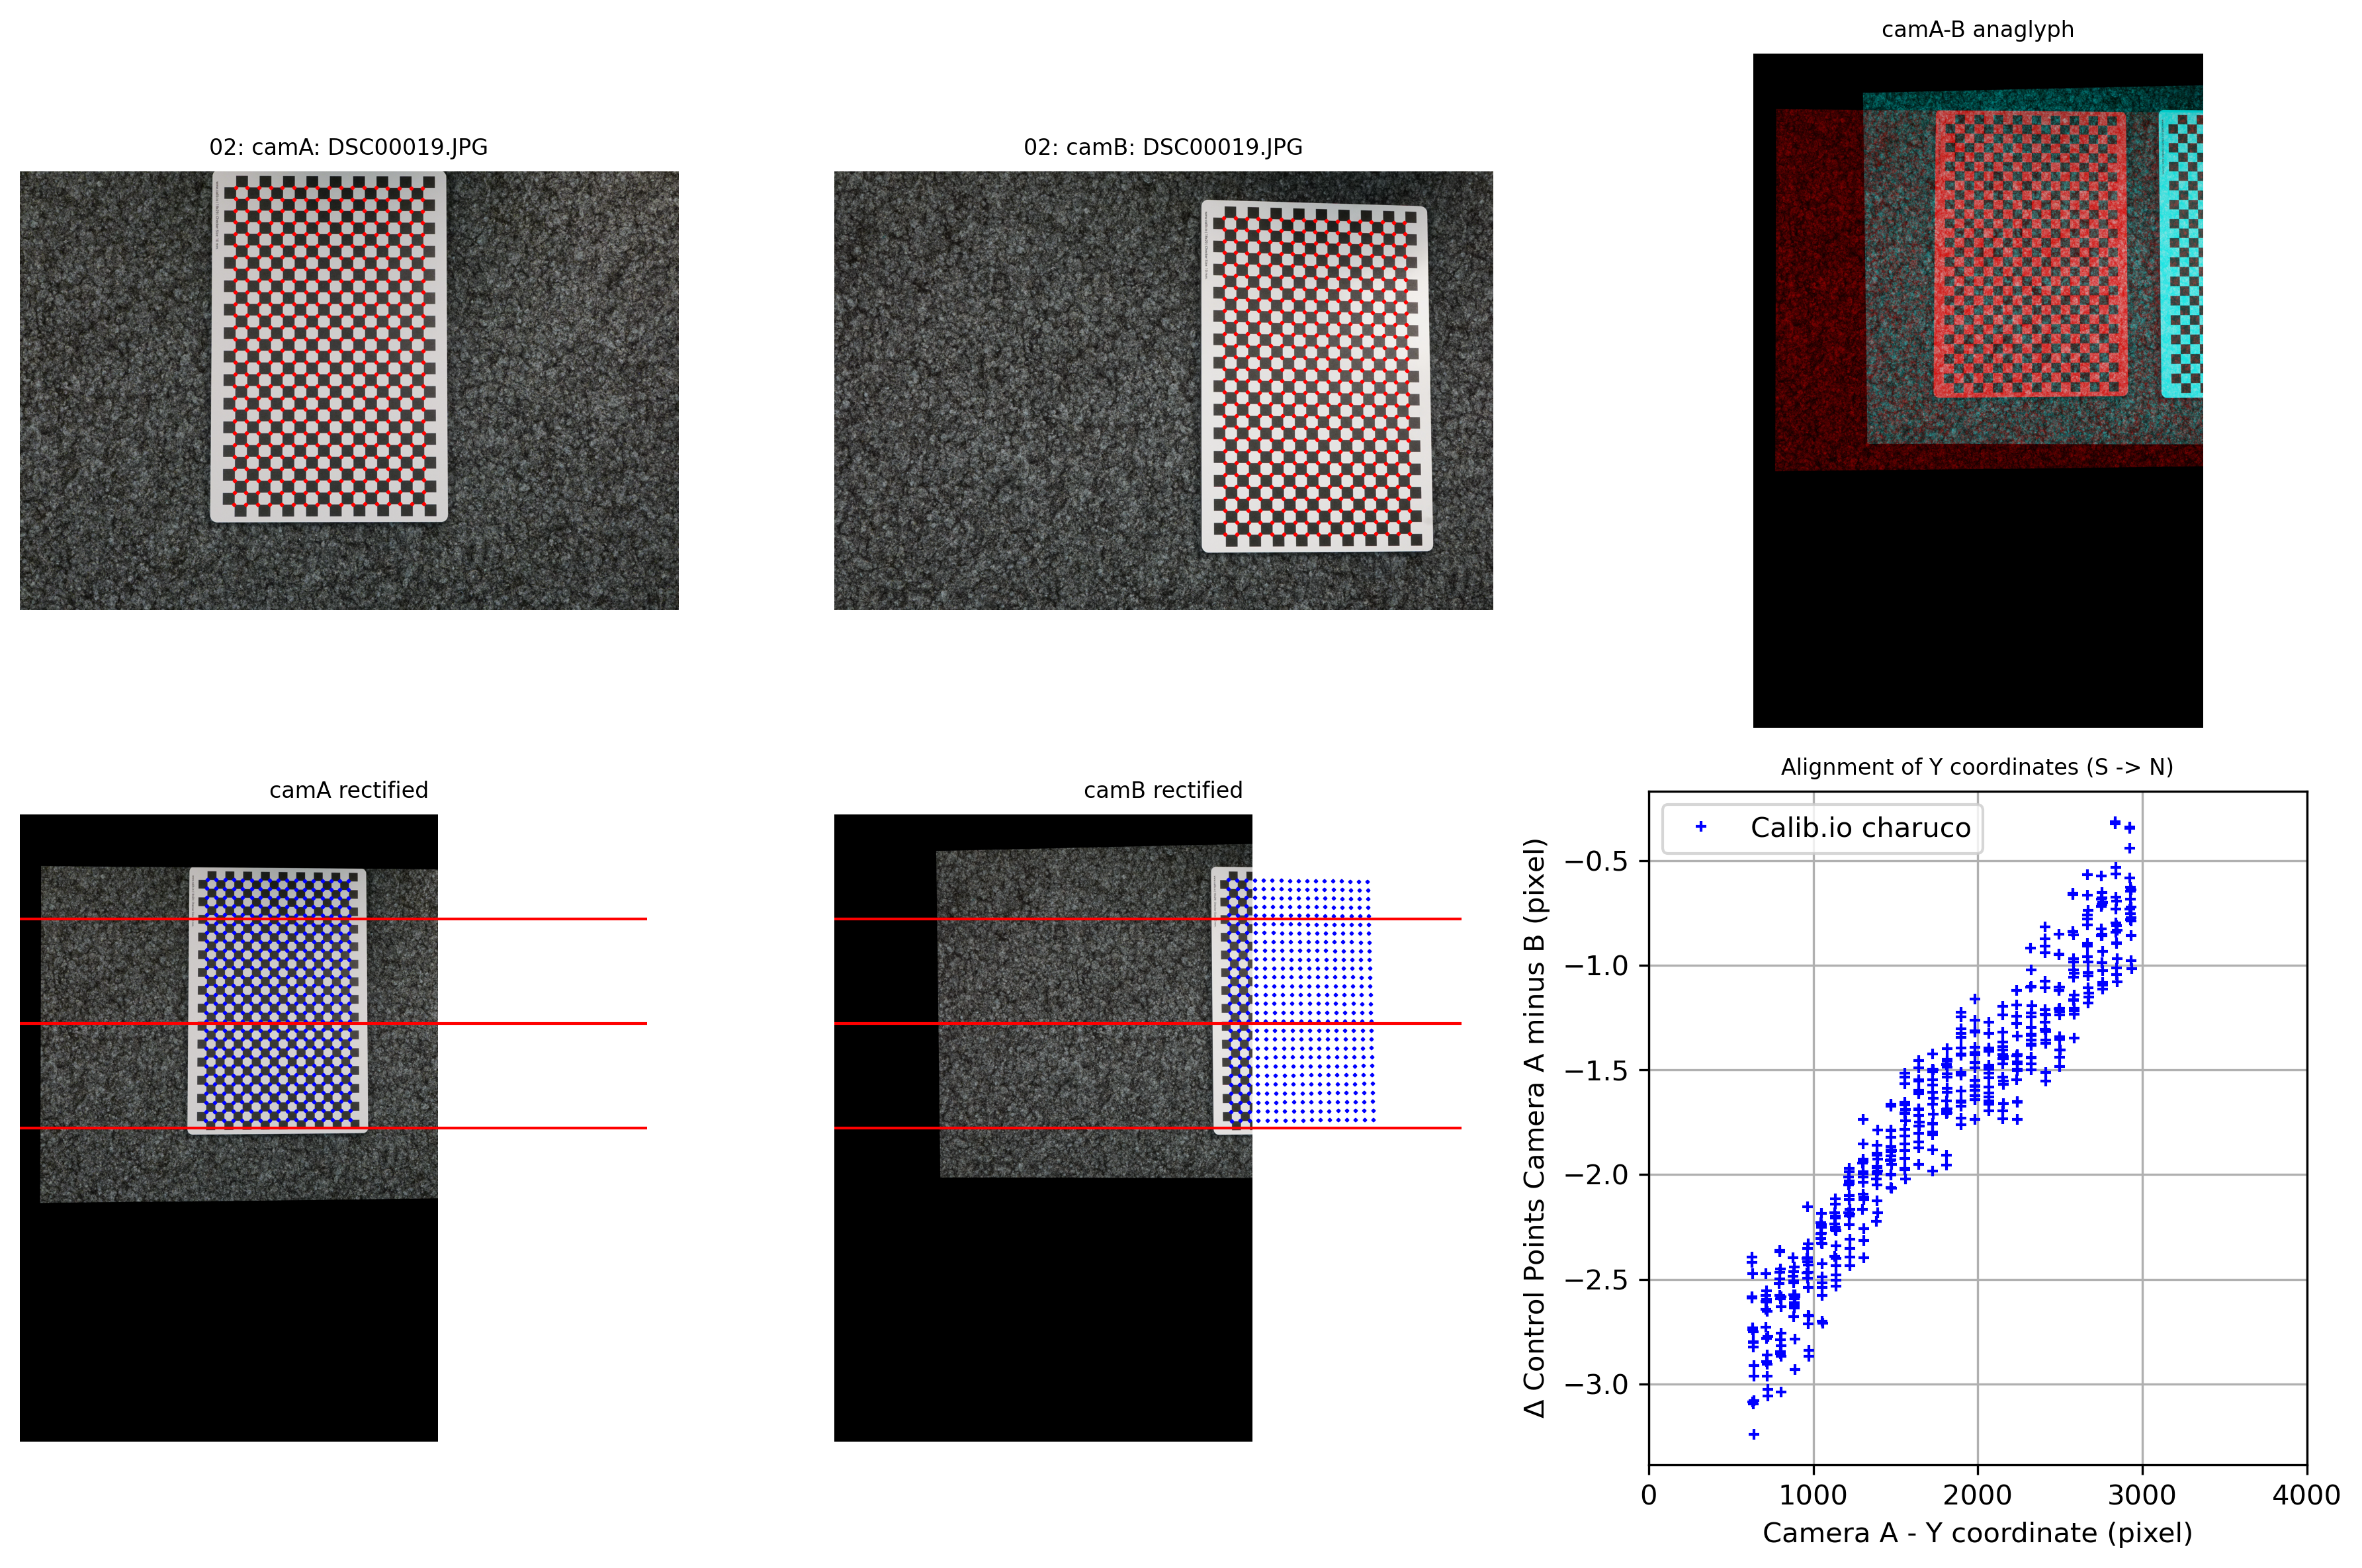

In [115]:
camA_rectified=camA_rectified_opencv_opt
camB_rectified=camB_rectified_opencv_opt
camA_imgpoints_rectified=camA_imgpoints_rectified_opencv_opt
camB_imgpoints_rectified=camB_imgpoints_rectified_opencv_opt

cam_AB_anaglyph = make_anaglyph(camA_rectified, camB_rectified, matrices["color"])

png_fn = os.path.join('rectified', 'camAB_rectified_%02d.png'%ifile)
png_fn2 = os.path.join('rectified', 'camAB_rectified_evaluation_%02d.png'%ifile)
plot_camAB_6panel(ifile, image_size, camA_frame, camA_ifile_imgpoints, camB_frame, camB_ifile_imgpoints, cam_AB_anaglyph,
              camA_rectified, camA_imgpoints_rectified,
              camB_rectified, camB_imgpoints_rectified,
              png_fn='6panel.png')

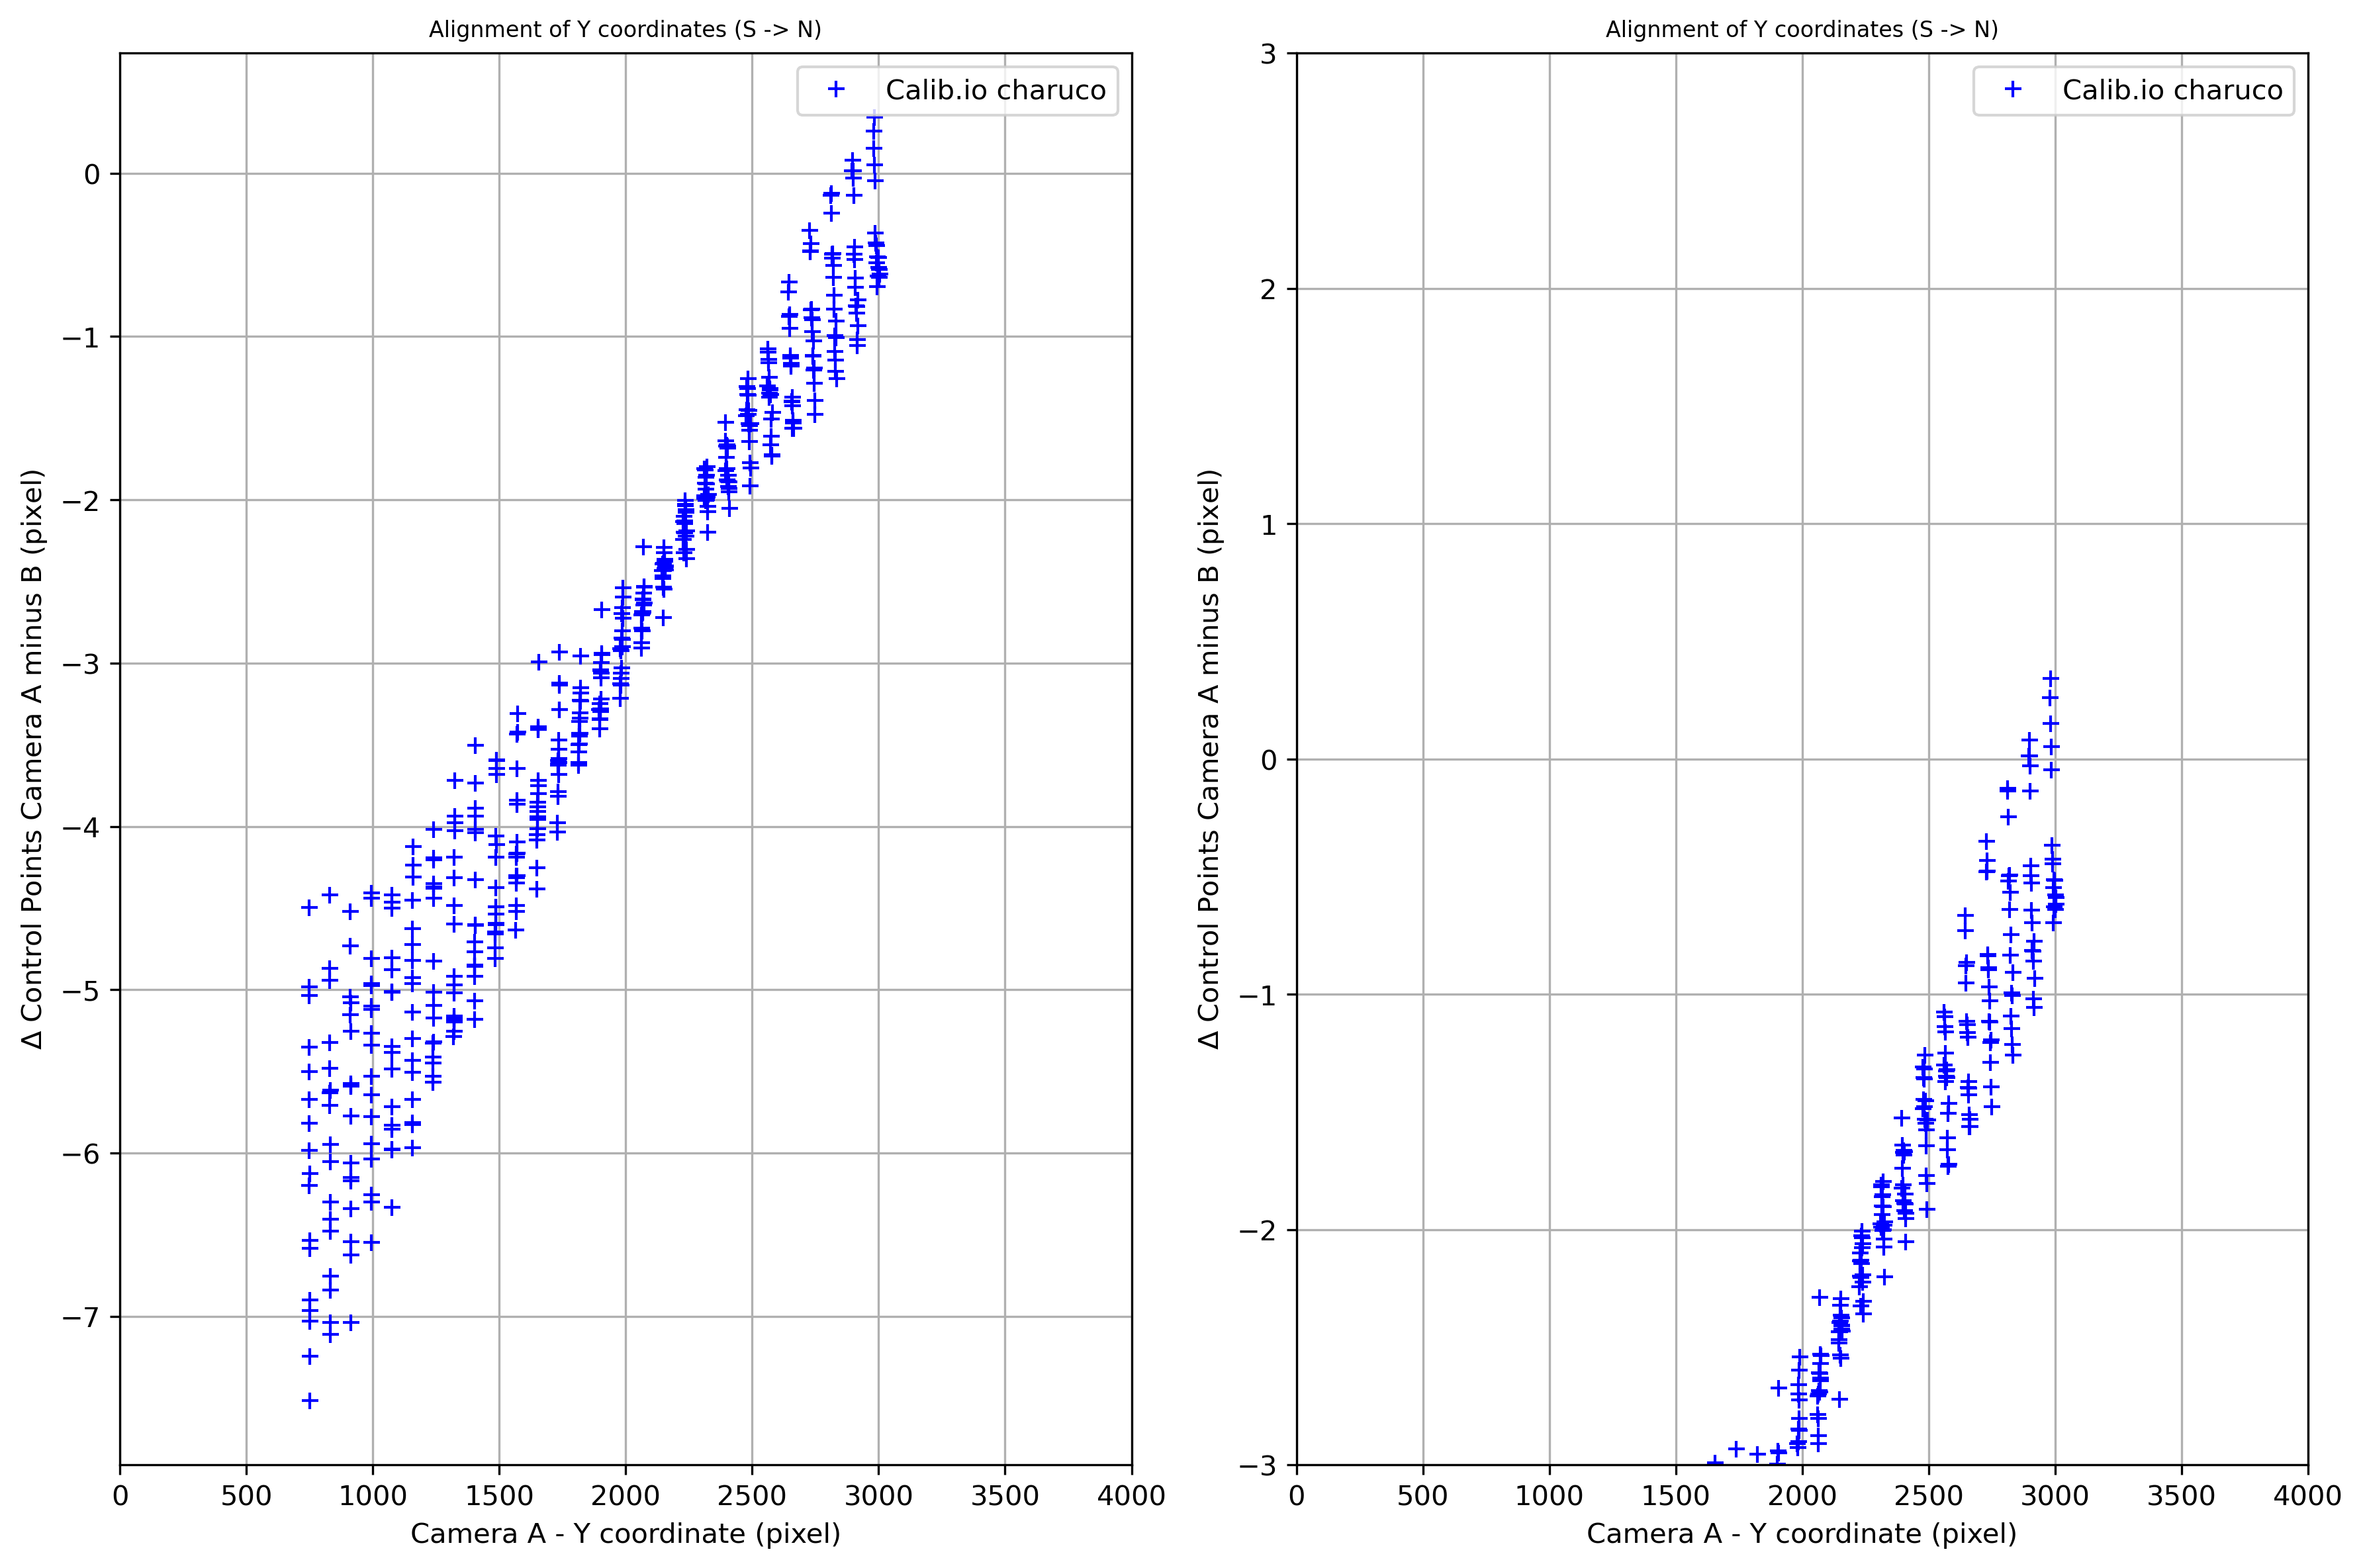

In [58]:
plot_camAB_2panel(ifile, image_size, camA_frame, camA_ifile_imgpoints, camB_frame, camB_ifile_imgpoints, cam_AB_anaglyph,
              camA_rectified, camA_imgpoints_rectified,
              camB_rectified, camB_imgpoints_rectified,
              png_fn='2panel.png')

In [88]:
def depth_map(imgL, imgR, window_size=15):
    """ Depth map calculation. Works with SGBM and WLS. Need rectified images, returns depth map ( left to right disparity ) """
    # SGBM Parameters -----------------
    # window_size = 15  # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely

    left_matcher = cv2.StereoSGBM_create(
        minDisparity=-1,
        numDisparities=16*16,  # max_disp has to be dividable by 16 f. E. HH 192, 256
        blockSize=window_size,
        P1=4 * 3 * window_size,
        P2=8 * 3 * window_size,
        disp12MaxDiff=1,
        uniquenessRatio=5,
        speckleWindowSize=50,
        speckleRange=2,
        preFilterCap=63,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
    )
    right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)
    # FILTER Parameters
    lmbda = 80000
    sigma = 1.3
    visual_multiplier = 6

    wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=left_matcher)
    wls_filter.setLambda(lmbda)

    wls_filter.setSigmaColor(sigma)
    displ = left_matcher.compute(imgL, imgR)  # .astype(np.float32)/16
    dispr = right_matcher.compute(imgR, imgL)  # .astype(np.float32)/16
    displ = np.int16(displ)
    dispr = np.int16(dispr)
    filteredImg = wls_filter.filter(displ, imgL, None, dispr)  # important to put "imgL" here!!!

    filteredImg = cv2.normalize(src=filteredImg, dst=filteredImg, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX);
    filteredImg = np.uint8(filteredImg)

    return filteredImg

(array([12051541.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,  9599024.,  2349435.]),
 array([-32768. , -29085.2, -25402.4, -21719.6, -18036.8, -14354. ,
        -10671.2,  -6988.4,  -3305.6,    377.2,   4060. ]),
 <BarContainer object of 10 artists>)

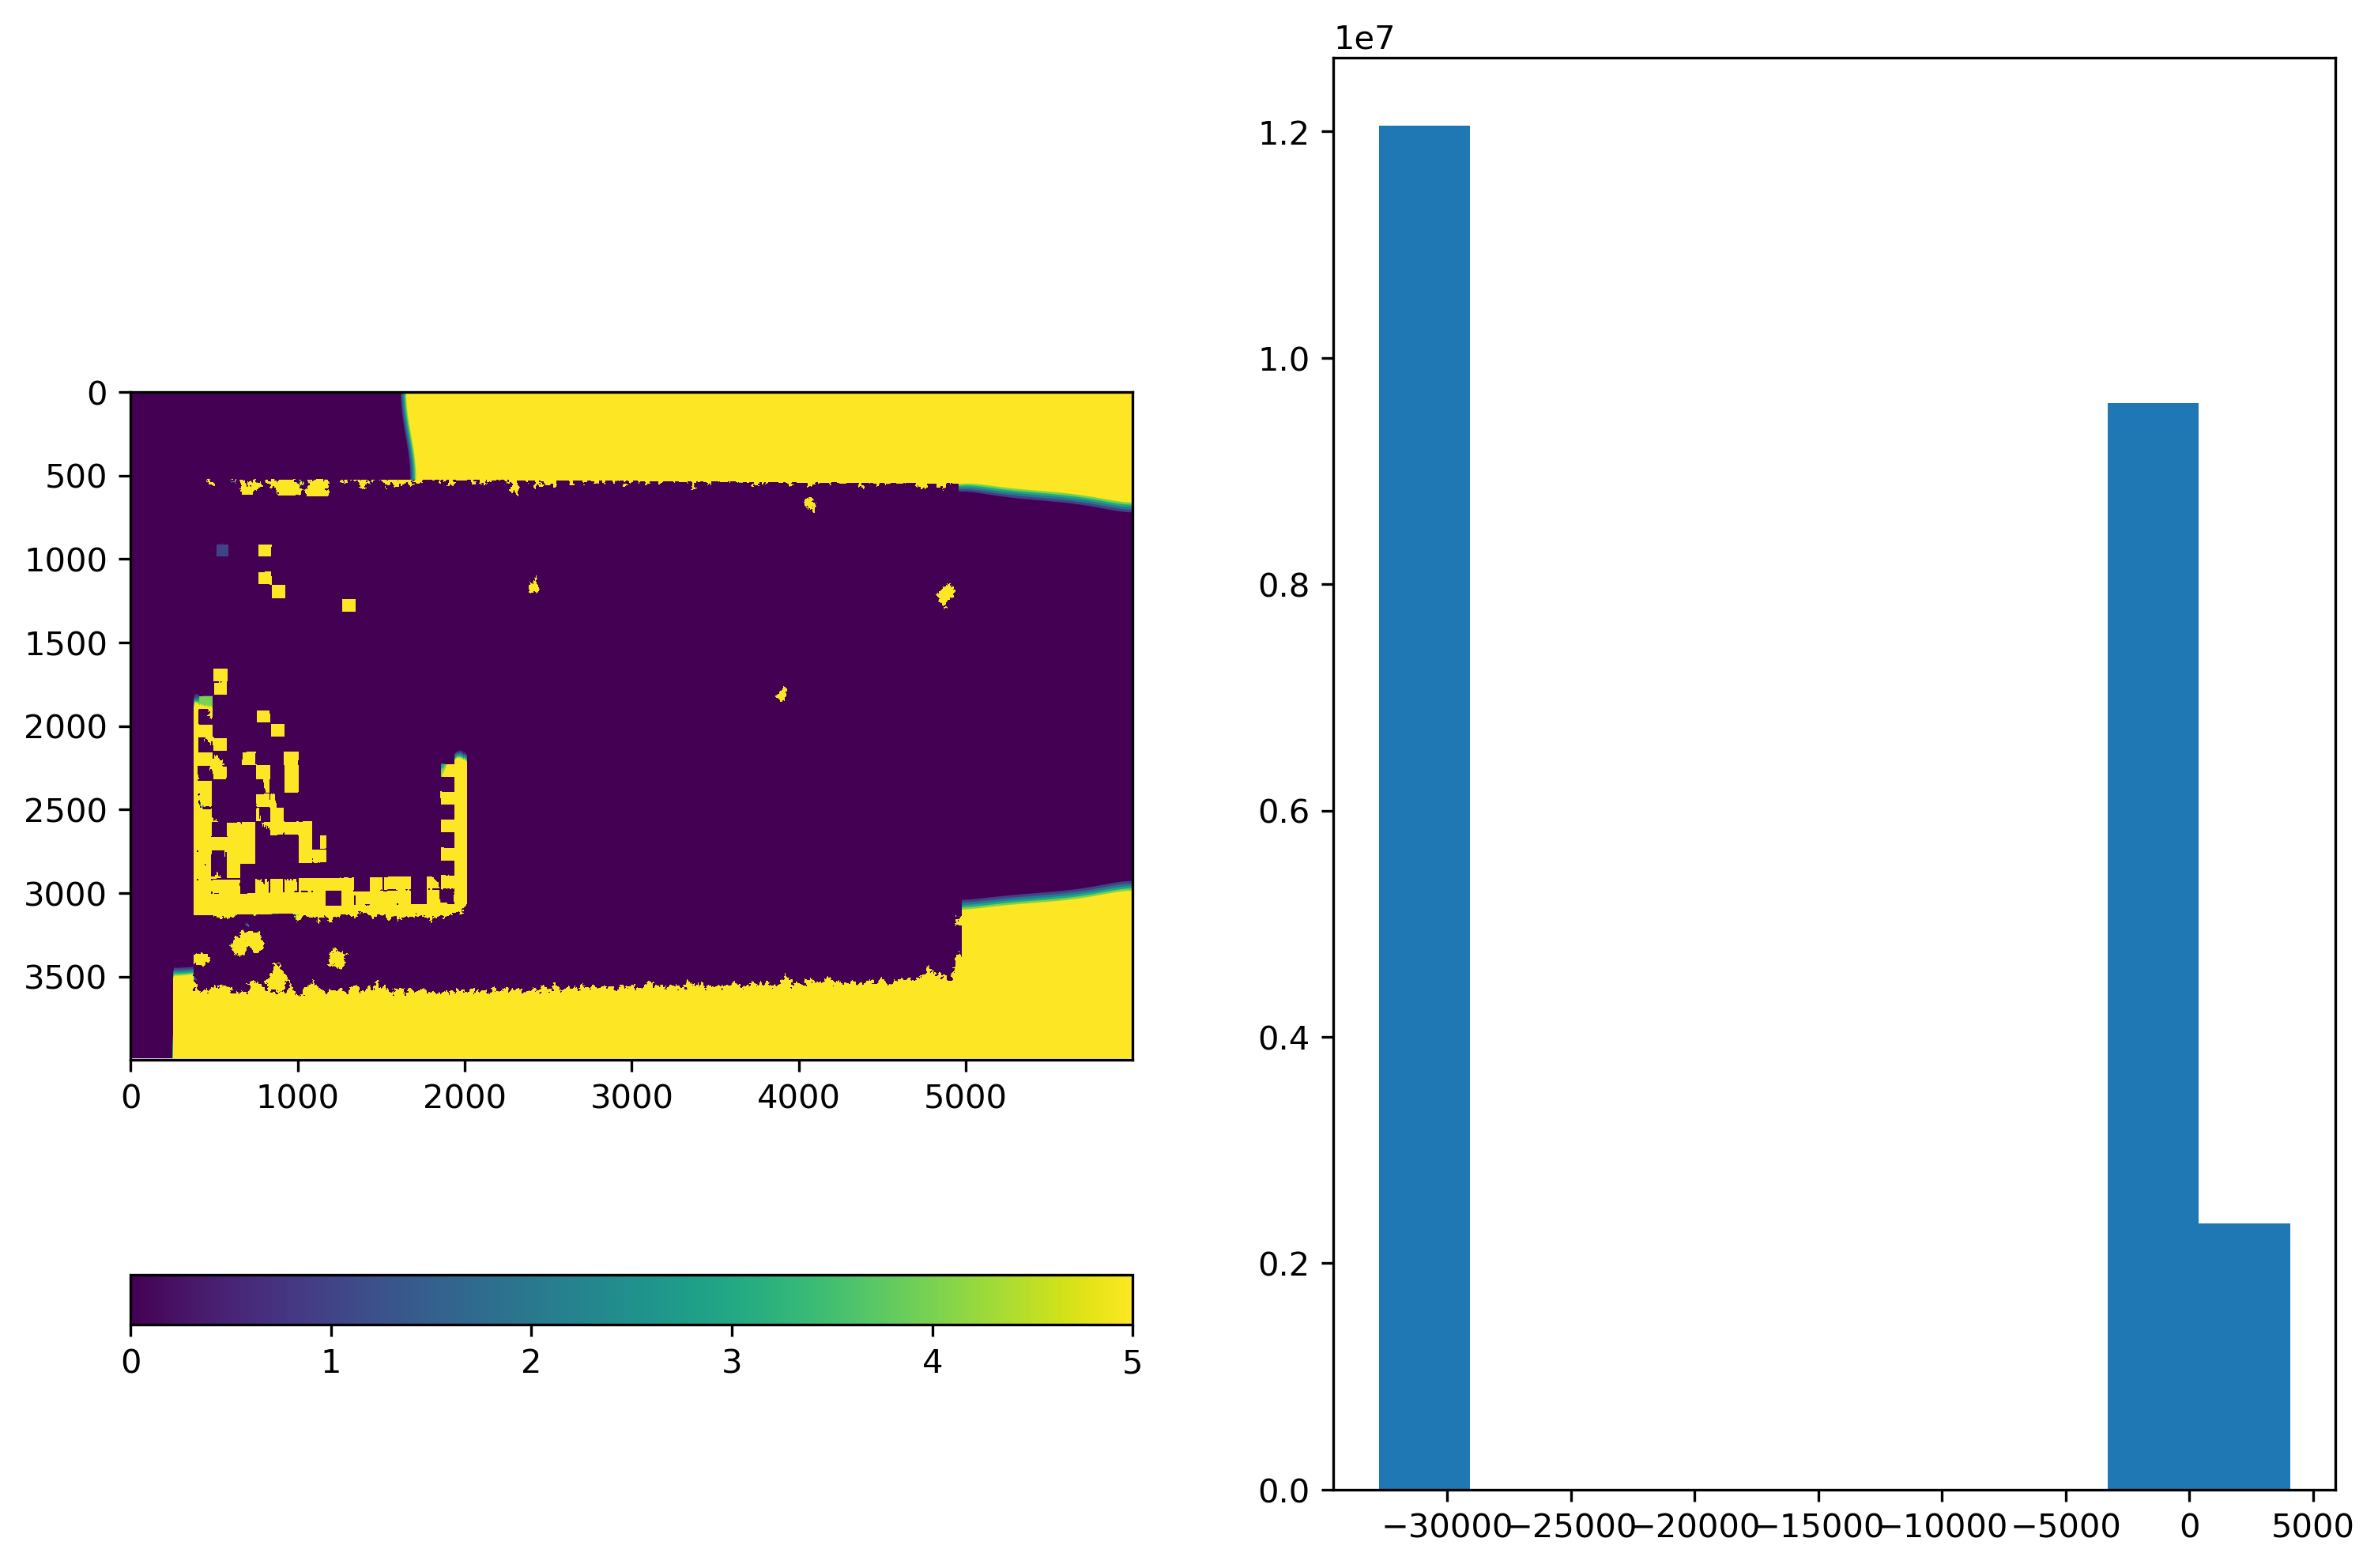

In [89]:
#SGBM can handle color images
camA_roi = camA_roi_opencv_opt
camB_roi = camB_roi_opencv_opt

imgL = camA_rectified
imgR = camB_rectified
camAB_disparity_SGBM_f = depth_map(imgL, imgR, window_size=5)
camAB_disparity_SGBM_f_nan = np.empty_like(camAB_disparity_SGBM_f, dtype='float32')
camAB_disparity_SGBM_f_nan.fill(np.nan)
camAB_disparity_SGBM_f_nan[camA_roi[1]:camA_roi[3],camA_roi[0]:camA_roi[2]] = camAB_disparity_SGBM_f[camA_roi[1]:camA_roi[3],camA_roi[0]:camA_roi[2]]

fig, ax = plt.subplots(1, 2, figsize=(12, 8), dpi=300)
im=ax[0].imshow(camAB_disparity_SGBM_f_nan, vmin=0, 
             vmax=5)
plt.colorbar(im, ax=ax[0], orientation='horizontal')
ax[1].hist(camAB_disparity_SGBM_f.ravel(), bins=10)

In [75]:
np.nanpercentile(camAB_disparity_SGBM_f_nan,98)

255.0